In [1]:
import numpy as np
import math
from scipy.stats import norm
from scipy import integrate
import torch
import csv
import gpytorch
import scipy.optimize as optimize
import itertools
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os
import time
import Tasmanian
from matplotlib import pyplot as plt
import bo_methods_lib
from bo_methods_lib.GP_Validation import path_name_gp_val

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DateTime = "../2022/11/29/11-15"
emulator = True
set_lengthscale = None
t = 300
obj = "obj"
Case_Study = 2.2
fxn = "LOO_Plots_2_Input"
log_sse_model = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/log_sse_model.npy"))
log_sse_sim = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/log_sse_sim.npy"))
iters = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/iter_space.npy"))

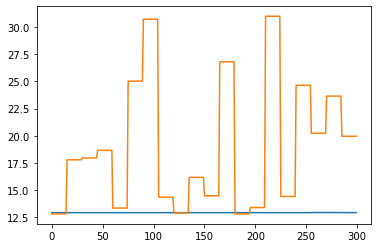

In [3]:
# print(log_sse_model)
# print(log_sse_sim)

plt.plot(iters, log_sse_model)
plt.plot(iters, log_sse_sim)

In [4]:
DateTime = "../2022/11/29/11-15"
emulator = True
set_lengthscale = None
t = 300
obj = "obj"
Case_Study = 2.2
fxn = "LOO_Plots_3_Input"
y_model = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_model.npy"))
y_sim = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_sim.npy"))
iters = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/iter_space.npy"))

print(y_model.shape)

(300, 1)


[-28.95335378  -2.03840908 -28.95335388  -2.03840908 -28.95335388]


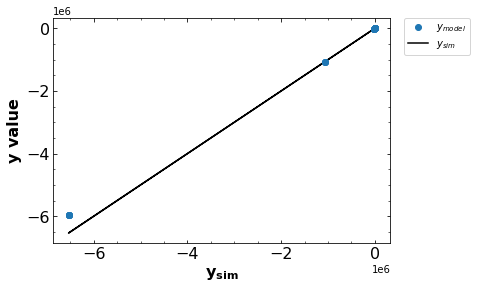

In [5]:
y_sim = y_sim.flatten()
GP_mean = y_model.flatten()
print(GP_mean[0:5])
# GP_stdev = GP_stdev.flatten()

#Define function (fxn), length of GP mean predictions (p), and number of tests (t), and obj ("obj")
fxn = "LOO_parity_plot_emul"
emulator = True
p = GP_mean.shape[0]
obj = "obj"

#Create figure
plt.figure(figsize = (6.4,4))
# Compare the GP Mean to the true model (simulated model ysim)
    #For sse calc lower and upper bound separately 
plt.scatter(y_sim,GP_mean, label = "$y_{model}$", zorder=2 )
plt.plot(y_sim, y_sim, label = "$y_{sim}$" , zorder=1, color = "black")

#Set plot details        
#     plt.legend(loc = "best")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0, loc = "upper left")
plt.tight_layout()
#     plt.legend(fontsize=10,bbox_to_anchor=(1.02, 0.3),borderaxespad=0)
plt.xlabel(r'$\mathbf{y_{sim}}$', fontsize=16, fontweight='bold')
plt.ylabel("y value", fontsize=16, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=5)
plt.minorticks_on() # turn on minor ticks
plt.tick_params(which="minor",direction="in",top=True, right=True)


In [43]:
DateTime = "../2022/12/08/14-43"
emulator = True
set_lengthscale = None
t = 300
obj = "obj"
Case_Study = 2.2
fxn = "LOO_parity_plot_emul"
y_model_0_1 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_model.npy", plot_axis = 0, plot_num = 1))
y_sim_0_1 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_sim.npy",  plot_axis = 0, plot_num = 1))
y_model_0_14 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_model.npy", plot_axis = 0, plot_num = 14))
y_sim_0_14 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_sim.npy",  plot_axis = 0, plot_num = 14))

y_model_1_14 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_model.npy", plot_axis = 1, plot_num = 14))
y_sim_1_14 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_sim.npy",  plot_axis = 1, plot_num = 14))

y_model_1_1 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_model.npy", plot_axis = 1, plot_num = 1))
y_sim_1_1 = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
                 is_figure = False, csv_end = "/y_sim.npy",  plot_axis = 1, plot_num = 1))
# iters = np.load(path_name_gp_val(emulator, fxn, set_lengthscale, t, obj, Case_Study, DateTime, 
#                  is_figure = False, csv_end = "/iter_space.npy"))

# y_model_1_1 = y_model_1_1.reshape(-1,20)[0]
# y_sim_1_1 = y_sim_1_1.reshape(-1,20)[0]

(300,)
[-65.03978994 -65.04408578 -65.04408791 -65.0440761  -65.0340634 ]


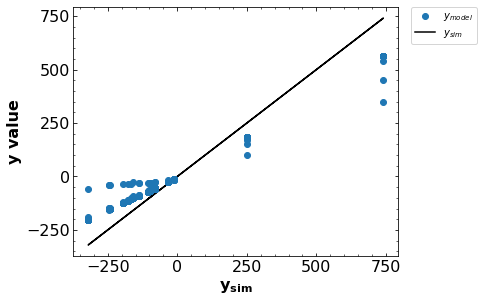

In [45]:
y_sim = y_sim_1_14.flatten()
GP_mean = y_model_1_14.flatten()
print(GP_mean.shape)
print(GP_mean[0:5])
# GP_stdev = GP_stdev.flatten()

#Define function (fxn), length of GP mean predictions (p), and number of tests (t), and obj ("obj")
fxn = "LOO_parity_plot_emul"
emulator = True
p = GP_mean.shape[0]
obj = "obj"

#Create figure
plt.figure(figsize = (6.4,4))
# Compare the GP Mean to the true model (simulated model ysim)
    #For sse calc lower and upper bound separately 
plt.scatter(y_sim,GP_mean, label = "$y_{model}$", zorder=2 )
plt.plot(y_sim, y_sim, label = "$y_{sim}$" , zorder=1, color = "black")

#Set plot details        
#     plt.legend(loc = "best")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0, loc = "upper left", fontsize=16)
plt.tight_layout()
#     plt.legend(fontsize=10,bbox_to_anchor=(1.02, 0.3),borderaxespad=0)
plt.xlabel(r'$\mathbf{y_{sim}}$', fontsize=16, fontweight='bold')
plt.ylabel("y value", fontsize=16, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=5)
plt.minorticks_on() # turn on minor ticks
plt.tick_params(which="minor",direction="in",top=True, right=True)